In [30]:
import numpy as np
import mne
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
from settings.config import Settings
from device.data_client import NeuracleDataClient
from scipy import signal
from scipy.fft import fft, fftfreq


config_info = Settings.CONFIG_INFO


In [2]:
config_info = Settings.CONFIG_INFO
config_info

{'host': '127.0.0.1',
 'port': 8712,
 'controlmode': 'socket',
 'channel_count': 9,
 'sample_rate': 1000,
 'buffer_length': 10,
 'channel_labels': ['CH001',
  'CH002',
  'CH003',
  'CH004',
  'CH005',
  'CH006',
  'CH007',
  'CH008',
  'STIM'],
 'strips': [['CH001', 'CH002', 'CH003', 'CH004'],
  ['CH005', 'CH006', 'CH007', 'CH008']],
 'reref': 'average',
 'normP': [[-14, -13.4],
  [-13.98, -13.37],
  [-13.82, -13.2],
  [-13.8, -13],
  [-14, -13.46],
  [-14.09, -13.4],
  [-14.02, -13.34]],
 'visbands': [60, 90],
 'stds': 3,
 'nperseg': 1000}

In [14]:
receiver = NeuracleDataClient(n_channel=len(config_info['channel_labels']),
                    samplerate=config_info['sample_rate'],
                    host=config_info['host'],
                    port=config_info['port'],
                    buffer_len=config_info['buffer_length'])

In [ ]:
def _parse_data(data):
    fs, event, data_array = data
    # do preprocessing
#     data_array = reref(data_array, self.reref_method)
    return fs, event,data_array

def fetch_data():
    # 这里用随机数据模拟接收到的数据
    data_from_buffer= receiver.get_trial_data(clear=False)

    fs, event,data = _parse_data(data_from_buffer)
    return fs, event,data

# 计算PSD (功率谱密度)
def plot_psd(s, label, color, linestyle='-'):
    f, Pxx = signal.welch(s, fs, nperseg=1024)
    plt.semilogy(f, Pxx, label=label, color=color, linestyle=linestyle)



# 滤波
def bandpass_filter(data, lowcut = 1, highcut = 300 ):
    fs = 1000  # 采样频率 (Hz)
    nyq = 0.5 * fs  # 奈奎斯特频率
    low = lowcut / nyq
    high = highcut / nyq

    # 使用巴特沃斯滤波器
    order = 4  # 滤波器阶数
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_signal = signal.filtfilt(b, a, data)

    return filtered_signal




(9, 1000)


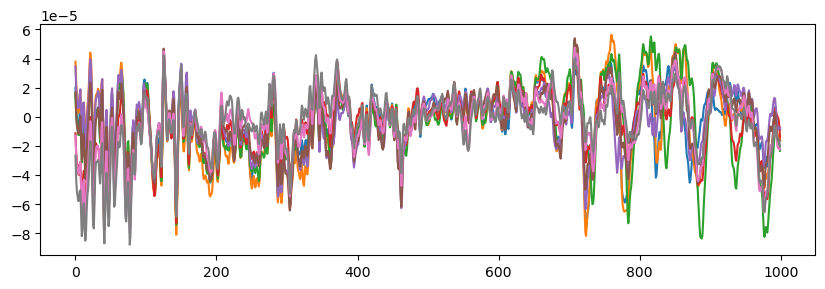

In [ ]:
config_info['buffer_length'] = 1
data_from_buffer= receiver.get_trial_data(clear=False)

fs, event,data = _parse_data(data_from_buffer)

print(data.shape)
data = data[:8, :]
data_filt = bandpass_filter(data=data)
plt.figure(figsize=(10, 3))
for ch in range(8):
    plt.plot(data_filt[ch, :])

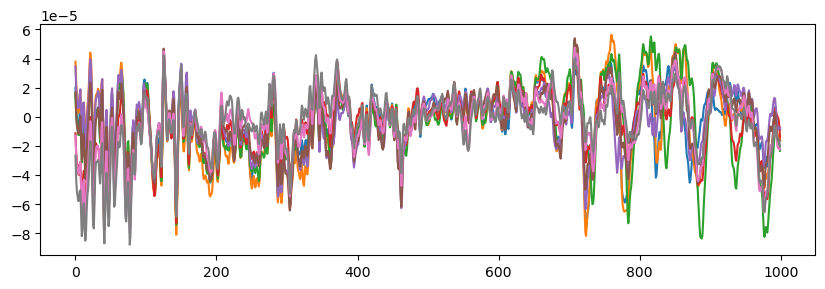

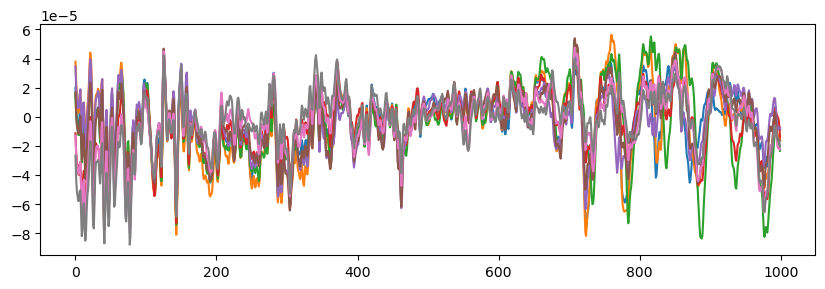

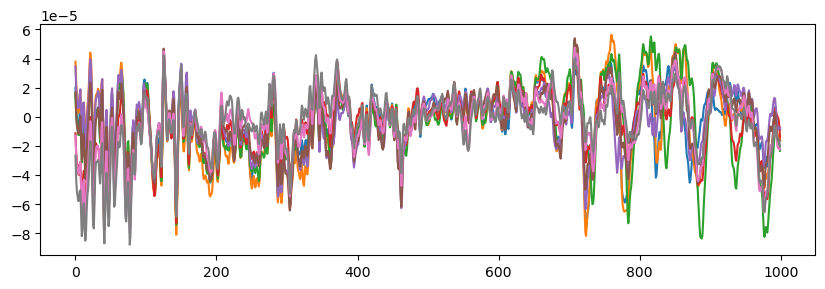

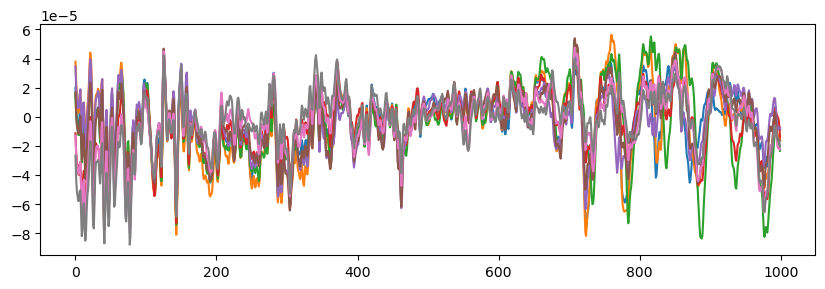

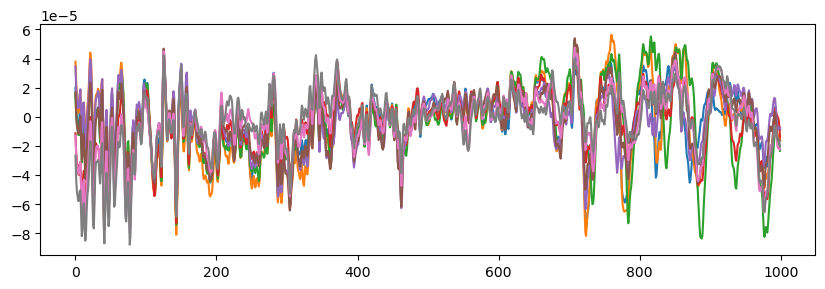

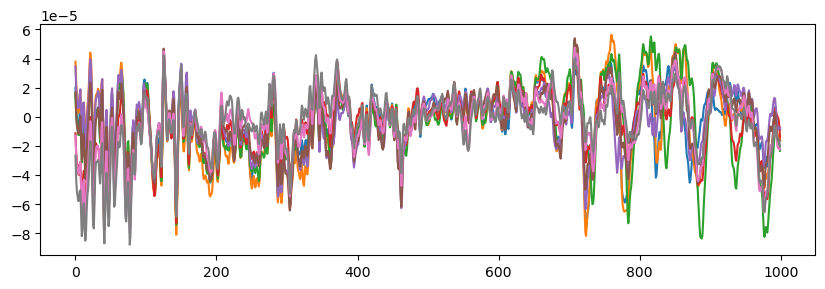

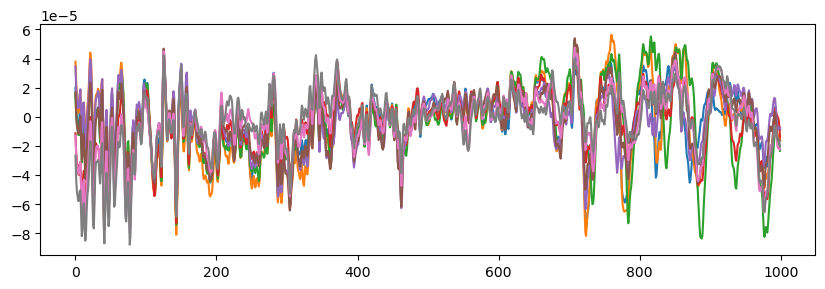

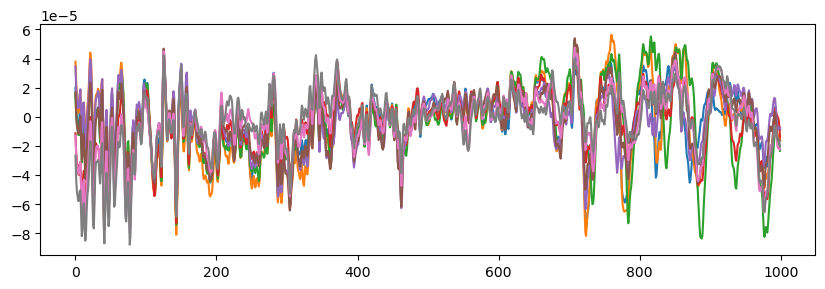

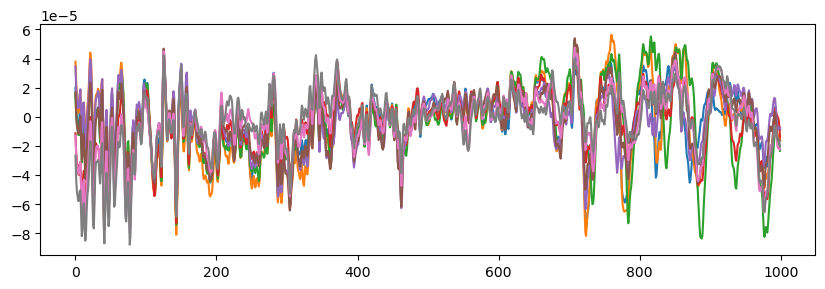

KeyboardInterrupt: 

In [ ]:
while True:
    fs, events, data = fetch_data()
    data = data[:8, :]
    data_filt = bandpass_filter(data=data)


    plt.figure(figsize=(10, 3))
    for ch in range(8):
        plt.plot(data_filt[ch, :])
    
    plt.show()
    
    time.sleep(1)
    clear_output(wait=True)

    

In [ ]:
# import time

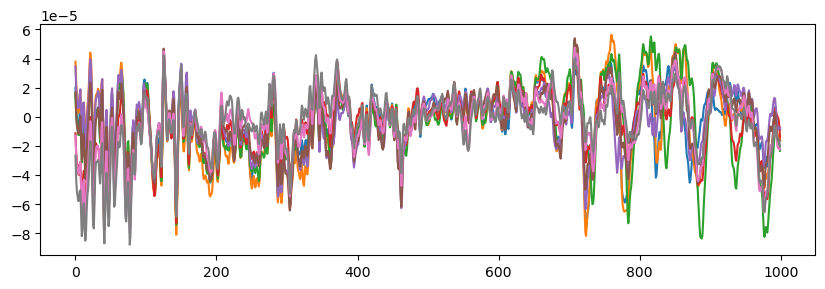

In [29]:
fs, events, data = fetch_data()
data = data[:8, :]
data_filt = bandpass_filter(data=data)


plt.figure(figsize=(10, 3))
for ch in range(8):
    plt.plot(data_filt[ch, :])

plt.show()